In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
iris = load_iris(as_frame=True)

In [3]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-2, 2, 50)
xx, yy = np.meshgrid(x, y)
xx

array([[-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       ...,
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ]])

In [4]:
np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))

[array([[2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ],
        [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ],
        [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ],
        ...,
        [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ],
        [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ],
        [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ]]),
 array([[0.8       , 0.8       , 0.8       , ..., 0.8       , 0.8       ,
         0.8       ],
        [0.80954774, 0.80954774, 0.80954774, ..., 0.80954774, 0.80954774,
         0.80954774],
        [0.81909548, 0.81909548, 0.81909548, ..., 0.81909548, 0.81909548,
         0.81909548],
        ...,
        [2.68090452, 2.68090452, 2.68090452, ..., 2.68090452, 2.68090452,
         2.68090452],
        [2.6

[[3.05915555 2.70297187]]


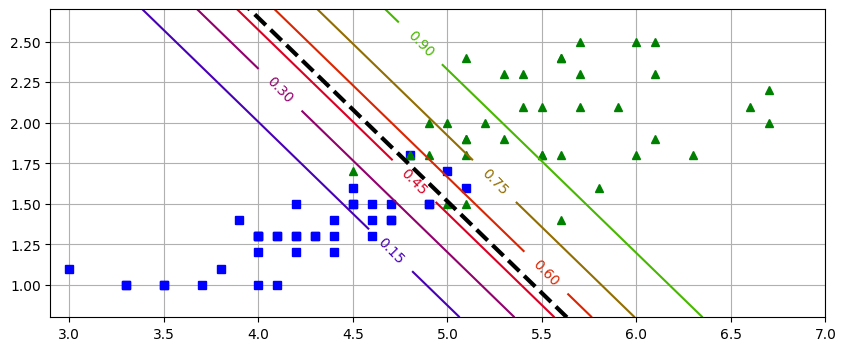

In [18]:
# extra code – this cell generates and saves Figure 4–24

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

print(log_reg.coef_)


# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# # for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
# plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
# plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
# plt.xlabel("Petal length")
# plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()